In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("hourly_transportation_202307.csv")
df=data.copy()

# DATA
- Dataset was obtained from IBB Open Data Portal (https://data.ibb.gov.tr/tr/). 
- This dataset contains 674174 rows and 8 columns. 
- For transport_type_id, 1: Highway 2: Rail 3: Marine Transportation

In [3]:
df.head()

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
0,2023-07-01,0,3,DENİZ,HALIC,Normal,1,1
1,2023-07-01,0,1,OTOYOL,YUZYIL MAH. - BAKIRKOY,Normal,7,6
2,2023-07-01,0,1,OTOYOL,USKUDAR-YENI MAHALLE,Normal,19,18
3,2023-07-01,0,1,OTOYOL,I.U AVCILAR KAMPUSU - SEHIR HASTANESI,Normal,9,8
4,2023-07-01,0,1,OTOYOL,YENIBOSNA METRO-KAZLICESME,Normal,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674174 entries, 0 to 674173
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   transition_date      674174 non-null  object
 1   transition_hour      674174 non-null  int64 
 2   transport_type_id    674174 non-null  int64 
 3   road_type            674174 non-null  object
 4   line                 674174 non-null  object
 5   transfer_type        674174 non-null  object
 6   number_of_passage    674174 non-null  int64 
 7   number_of_passenger  674174 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 41.1+ MB


In [5]:
df.dtypes

transition_date        object
transition_hour         int64
transport_type_id       int64
road_type              object
line                   object
transfer_type          object
number_of_passage       int64
number_of_passenger     int64
dtype: object

In [6]:
df.isnull().sum()

transition_date        0
transition_hour        0
transport_type_id      0
road_type              0
line                   0
transfer_type          0
number_of_passage      0
number_of_passenger    0
dtype: int64

In [7]:
df[["transport_type_id","road_type"]].head()

,transport_type_id,road_type
0,3,DENİZ
1,1,OTOYOL
2,1,OTOYOL
3,1,OTOYOL
4,1,OTOYOL


In [8]:
df["transport_type_id"].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df["road_type"].unique()

array(['DENİZ', 'OTOYOL', 'RAYLI'], dtype=object)

In [10]:
df.columns

Index(['transition_date', 'transition_hour', 'transport_type_id', 'road_type',
       'line', 'transfer_type', 'number_of_passage', 'number_of_passenger'],
      dtype='object')

In [11]:
unique_combinations = df[['transport_type_id', 'road_type']].drop_duplicates() #We get the matches of transport_type_id and road_type
print(unique_combinations)

    transport_type_id road_type
0                   3     DENİZ
1                   1    OTOYOL
20                  2     RAYLI


# METHODOLOGY
- Missing values are checked if there is any.
- Pandas was used for data analysis.
- Seaborn and Matplotlib were used for plotting and visualization.

# QUESTIONS

## 1-Which are the 3 most used lines in July?

In [12]:
df['Total'] =df.groupby(['line'])['number_of_passage'].transform('sum')

In [13]:
new_df = df.drop_duplicates(subset=['line'])
new_df

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,Total
0,2023-07-01,0,3,DENİZ,HALIC,Normal,1,1,286143
1,2023-07-01,0,1,OTOYOL,YUZYIL MAH. - BAKIRKOY,Normal,7,6,84149
2,2023-07-01,0,1,OTOYOL,USKUDAR-YENI MAHALLE,Normal,19,18,78904
3,2023-07-01,0,1,OTOYOL,I.U AVCILAR KAMPUSU - SEHIR HASTANESI,Normal,9,8,156242
4,2023-07-01,0,1,OTOYOL,YENIBOSNA METRO-KAZLICESME,Normal,1,1,105458
...,...,...,...,...,...,...,...,...,...
561086,2023-07-26,7,1,OTOYOL,BASAKSEHIR 4-5.ETAPLAR-METROKENT (RING),Normal,36,36,845
564391,2023-07-26,9,1,OTOYOL,CARSI-NARCICEGI,Normal,4,2,267
651820,2023-07-31,6,1,OTOYOL,YEDIKULE - EMINONU,Normal,33,33,121
652404,2023-07-31,6,1,OTOYOL,KARADENIZ MAH./ GUMUSSUYU,Aktarma,1,1,296


In [14]:
new_df.loc[:,["line","Total"]].sort_values(by="Total",ascending=False).head(3)

,line,Total
79,AVCILAR-ZINCIRLIKUYU,17442525
307,HALKALI - GEBZE,15837855
124,YENIKAPI - HACIOSMAN,11917941


In [15]:
import folium
m = folium.Map(location=[41.015137, 28.979530],zoom_start=10)
trail_coordinates1 = [(40.984733,28.7223733),(41.0662441,29.0101365)]
trail_coordinates2 = [(41.0181204,28.764216),(40.7843063,29.4074644)]
trail_coordinates3 = [(41.0036776,28.9383417),(41.1397534,29.0281411)]
folium.PolyLine(trail_coordinates1, tooltip="Avcılar-Zincirlikuyu",color="red").add_to(m)
folium.Marker(
    location=[40.984733,28.7223733],icon=folium.Icon(color='red'),
    popup='Avcılar Metrobus Station').add_to(m)
folium.Marker(
    location=[41.0662441,29.0101365],icon=folium.Icon(color='red'),
    popup='Zincirlikuyu Metrobus Station').add_to(m)
folium.PolyLine(trail_coordinates2, tooltip="Halkalı-Gebze",color="blue").add_to(m)
folium.Marker(
    location=[41.0181204,28.764216],icon=folium.Icon(color='blue'),
    popup='Halkalı Marmaray Station').add_to(m)
folium.Marker(
    location=[40.7843063,29.4074644],icon=folium.Icon(color='blue'),
    popup='Gebze Marmaray Station').add_to(m)
folium.PolyLine(trail_coordinates3, tooltip="Yenikapı-Hacıosman",color="darkgreen").add_to(m)
folium.Marker(
    location=[41.0036776,28.9383417],icon=folium.Icon(color='darkgreen'),
    popup='Yenikapı Metro Station').add_to(m)
folium.Marker(
    location=[41.1397534,29.0281411],icon=folium.Icon(color='darkgreen'),
    popup='Hacıosman Metro Station').add_to(m)
m

## 2-What is the total number of uses of public transportation vehicles in July?

In [16]:
a=new_df["Total"].sum()
print("Total number of trips in July: {}".format(a))

Total number of trips in July: 182281515


In [17]:
df.head()

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,Total
0,2023-07-01,0,3,DENİZ,HALIC,Normal,1,1,286143
1,2023-07-01,0,1,OTOYOL,YUZYIL MAH. - BAKIRKOY,Normal,7,6,84149
2,2023-07-01,0,1,OTOYOL,USKUDAR-YENI MAHALLE,Normal,19,18,78904
3,2023-07-01,0,1,OTOYOL,I.U AVCILAR KAMPUSU - SEHIR HASTANESI,Normal,9,8,156242
4,2023-07-01,0,1,OTOYOL,YENIBOSNA METRO-KAZLICESME,Normal,1,1,105458


In [18]:
df2= df.drop(columns=['Total'])
df2.head()

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
0,2023-07-01,0,3,DENİZ,HALIC,Normal,1,1
1,2023-07-01,0,1,OTOYOL,YUZYIL MAH. - BAKIRKOY,Normal,7,6
2,2023-07-01,0,1,OTOYOL,USKUDAR-YENI MAHALLE,Normal,19,18
3,2023-07-01,0,1,OTOYOL,I.U AVCILAR KAMPUSU - SEHIR HASTANESI,Normal,9,8
4,2023-07-01,0,1,OTOYOL,YENIBOSNA METRO-KAZLICESME,Normal,1,1


## 3-Which type of road is used the least in Istanbul?

In [21]:
df2.groupby("road_type").number_of_passage.sum().sort_values().head()

road_type
DENİZ      6461478
RAYLI     78635261
OTOYOL    97184776
Name: number_of_passage, dtype: int64

## 4-When is public transport used the most in Istanbul?

In [19]:
t_h=df2.groupby("transition_hour").sum()
print(t_h.sort_values(by="number_of_passage",ascending=False))

                 transport_type_id  number_of_passage  number_of_passenger
transition_hour                                                           
18                           46833           17062196             16186253
17                           46812           14654235             13822450
19                           45120           13665179             12842029
8                            45297           13499372             13225676
7                            44757           12598122             12405777
16                           46566           11938545             11119173
15                           44459           10619594              9816188
14                           42330           10110101              9332686
20                           41347            9548875              8858911
13                           41467            9325906              8642755
9                            43888            9274582              8909217
12                       

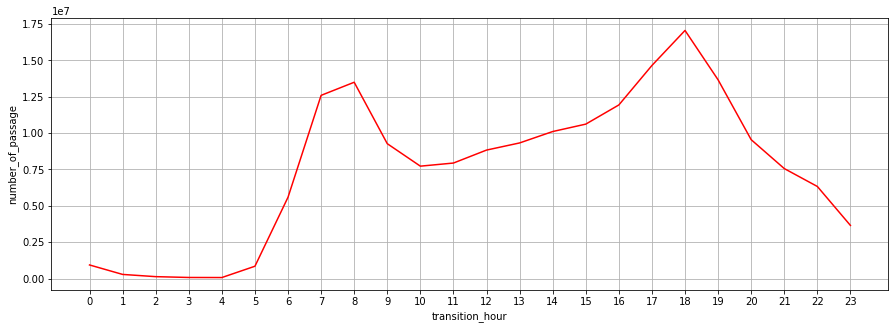

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="transition_hour",y="number_of_passage",data=t_h,color="red")
x = np.arange(0, 24, 1)
plt.xticks(x)
plt.grid()
plt.show()

In [22]:
t_d=df2.groupby("transition_date").sum()
print(t_d.sort_values(by="number_of_passage",ascending=False))

                 transition_hour  transport_type_id  number_of_passage  \
transition_date                                                          
2023-07-28                322167              27002            6753571   
2023-07-18                321620              26922            6732472   
2023-07-11                322707              27010            6731122   
2023-07-31                321797              27015            6695438   
2023-07-10                320559              26881            6691326   
2023-07-17                321001              26900            6681578   
2023-07-19                321629              26963            6665065   
2023-07-12                321639              26995            6664806   
2023-07-25                320444              26900            6662533   
2023-07-24                318021              26805            6640203   
2023-07-21                323882              27091            6608691   
2023-07-27                318223      

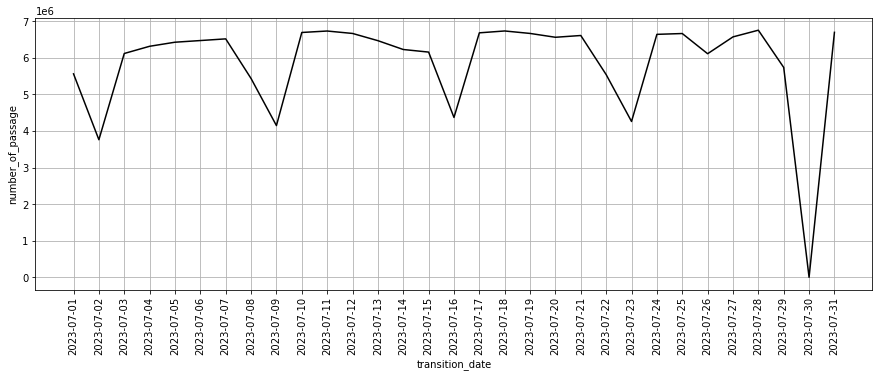

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="transition_date",y="number_of_passage",data=t_d,color="black")
plt.grid()
plt.xticks(rotation=90)
plt.show()

## 5-When comparing the first half and the last half of July, which one had more passenger ?

In [24]:
First_half=df2[df2["transition_date"] < "2023-07-16"].number_of_passenger.sum()
Last_half= df2[df2["transition_date"] >= "2023-07-16"].number_of_passenger.sum()
if First_half > Last_half:
    print("First half ({}) of july had more passenger than Last half ({}).".format(First_half,Last_half))
else :
    print("Last half ({}) of july had more passenger than First half ({}).".format(Last_half,First_half))

Last half (87478984) of july had more passenger than First half (84362597).


## 6-What time was the transfer made the most?

In [25]:
t_t=df2[df2["transfer_type"]=="Aktarma"].groupby("transition_hour").number_of_passenger.sum()
print(t_t)

transition_hour
0       80459
1       12827
2        4853
3        2345
4        1463
5       11563
6      273249
7      822871
8     1147152
9      999982
10     907820
11     947229
12    1009584
13    1111552
14    1233312
15    1308293
16    1333709
17    1432406
18    1618076
19    1475391
20    1079964
21     819645
22     649567
23     402783
Name: number_of_passenger, dtype: int64


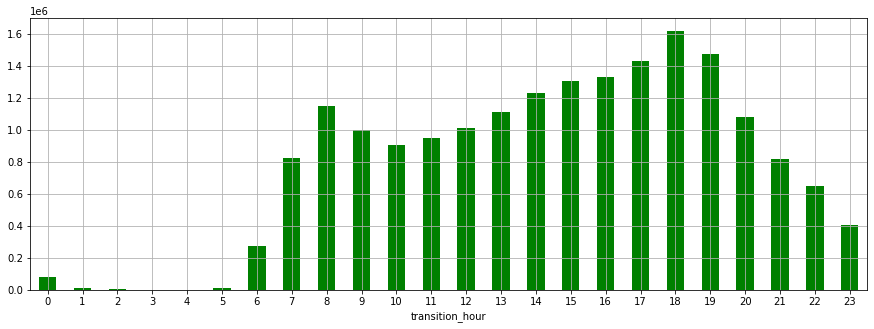

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
t_t.plot.bar(x='transition_hour',y="number_of_passenger", rot=0 ,color="green")
plt.grid()
plt.show()

# CONCLUSIONS DRAWN
- The lines most frequently used in Istanbul are Avcılar-Zincirlikuyu, Halkalı-Gebze, Yenikapı-Hacıosman.
- The total number of trips made in Istanbul in July is 182.281.515.
- The number of trips in Istanbul is mostly seen at the end of the working hours (18-17-19 PM) and going to work in the morning (8-7 AM),respectively.
- From the least used road type in Istanbul to the most, sea, rail, highway.
- When we look at the number of trips on a daily basis, public transport is used more on weekdays from Monday to Friday, while it decreases on weekends. The day with the least use of public transport on the weekend is Sunday.
- By a small margin, the number of passengers using public transport in the last half of July exceeded the number of passengers in the first half of July.